In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('datasets/placement.csv')
df.head(3)

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25


<Axes: xlabel='cgpa', ylabel='package'>

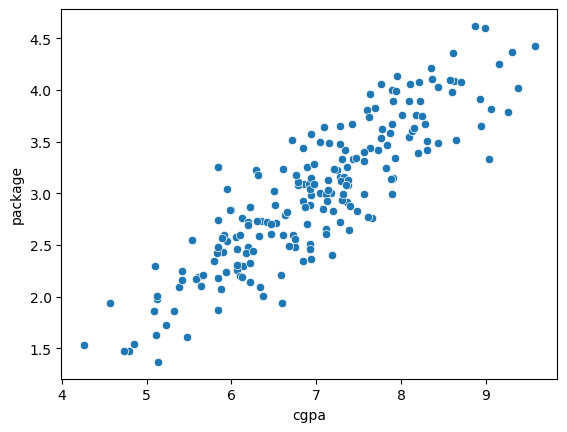

In [4]:
sns.scatterplot(df,x = 'cgpa',y = 'package')

## Train and Test data

In [10]:
X = df['cgpa'].values.reshape(-1,1)
y = df['package'].values.reshape(-1,1)

# Splitting 70/30 train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=28)

In [11]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(140, 1)
(140, 1)
(60, 1)
(60, 1)


## Fitting Linear Regression model

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

## Visualizing our fitted model

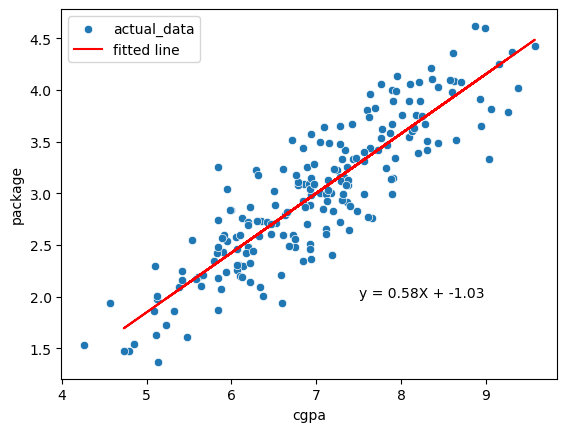

In [25]:
sns.scatterplot(df,x = 'cgpa',y = 'package',label = 'actual_data')
plt.plot(X_test,y_pred, c = 'red',label = 'fitted line')
plt.text(7.5,2,'y = {}X + {}'.format(np.round(lr.coef_[0][0],2),np.round(lr.intercept_[0],2)))
plt.legend()

In [24]:
lr.coef_[0][0]

0.5755418239529992

## Difference between test and predicted target

In [31]:
np.concatenate((y_test,y_pred),axis = 1)

array([[2.89      , 2.71939572],
       [2.71      , 2.73090656],
       [2.87      , 2.55248859],
       [3.81      , 3.34673631],
       [1.61      , 2.12658764],
       [2.44      , 2.57551026],
       [3.52      , 3.95105522],
       [3.11      , 2.87479201],
       [4.03      , 3.83019144],
       [3.34      , 3.53666511],
       [3.28      , 2.98414496],
       [2.83      , 3.11651958],
       [3.31      , 3.32371463],
       [2.6       , 2.37407063],
       [3.82      , 4.18702737],
       [3.24      , 2.7769499 ],
       [2.94      , 3.17407376],
       [3.64      , 3.05320998],
       [3.79      , 4.30213574],
       [3.83      , 3.39853507],
       [2.01      , 2.63881986],
       [2.46      , 2.46615732],
       [2.85      , 3.04745456],
       [3.89      , 3.70357224],
       [4.25      , 4.24458155],
       [2.6       , 2.48342357],
       [2.93      , 2.91507994],
       [4.37      , 4.33091283],
       [4.43      , 4.48630912],
       [4.62      , 4.07767442],
       [2.

## Creating own Linear Regression Model Class

In [50]:
class MyLinearModel:
    
    def __init__(self):
        self.m = None
        self.b = None
        
    def fit(self,X_train,y_train):
        x_mean = np.mean(X_train)
        y_mean = np.mean(y_train)
        
        num = (X_train - x_mean)*(y_train - y_mean)
        den = (X_train - x_mean)*(X_train - x_mean)
        
        self.m = np.sum(num)/np.sum(den)
        self.b = y_mean - self.m * x_mean
        
        return self.m, self.b
        
    def predict(self,X_test):
        y = self.m*X_test + self.b
        return y

In [51]:
model = MyLinearModel()

In [52]:
model.fit(X_train,y_train)

(0.5755418239529991, -1.0273815543933607)

In [53]:
y_pred2 = model.predict(X_test)

In [58]:
# Compare our model y_pred with sklearn y_pred
y_pred - y_pred2

array([[ 0.0000000e+00],
       [ 0.0000000e+00],
       [ 0.0000000e+00],
       [-8.8817842e-16],
       [-4.4408921e-16],
       [ 0.0000000e+00],
       [ 0.0000000e+00],
       [ 0.0000000e+00],
       [ 0.0000000e+00],
       [ 0.0000000e+00],
       [ 0.0000000e+00],
       [ 0.0000000e+00],
       [ 0.0000000e+00],
       [-4.4408921e-16],
       [ 0.0000000e+00],
       [ 0.0000000e+00],
       [ 0.0000000e+00],
       [ 0.0000000e+00],
       [ 0.0000000e+00],
       [ 0.0000000e+00],
       [ 0.0000000e+00],
       [ 0.0000000e+00],
       [ 0.0000000e+00],
       [ 0.0000000e+00],
       [ 0.0000000e+00],
       [ 0.0000000e+00],
       [-4.4408921e-16],
       [ 0.0000000e+00],
       [ 0.0000000e+00],
       [ 0.0000000e+00],
       [ 0.0000000e+00],
       [ 0.0000000e+00],
       [ 0.0000000e+00],
       [ 0.0000000e+00],
       [-4.4408921e-16],
       [ 0.0000000e+00],
       [-4.4408921e-16],
       [ 0.0000000e+00],
       [-4.4408921e-16],
       [-4.4408921e-16],


### So, our model prediction is working perfectly!